##Bank Marketing Predictions

The goal of this project is to build a Decision Tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data. Using the Bank Marketing dataset from the UCI Machine Learning Repository, the process involves preprocessing the data (handling missing values, encoding categorical variables), splitting the data into training and testing sets, and training the Decision Tree model. After training, the model is evaluated using accuracy, precision, recall, F1-score, and confusion matrix. The Decision Tree is also visualized to understand the decision-making process. Optional hyperparameter tuning is applied to improve model performance.

#1. Importing the library files

In [ ]:
 import numpy as np
 import pandas as pd
 import matplotlib.pyplot as plt
 import seaborn as sns
 from sklearn.model_selection import train_test_split
 from sklearn import metrics

# 2. Reading the Dataset

In [ ]:
url = "/content/bank-full.csv"
data = pd.read_csv(url, delimiter=";", quotechar='"')

In [ ]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


#First 5 rows of the dataset

In [ ]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


#Last 5 rows of the dataset

In [ ]:
data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


#Thorough exploration of the dataset
Vewing the Columns in the dataset

In [ ]:
col = data.columns
print(col)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')


#Checking for missing data before preprocessing


In [ ]:
missing_values = data.isnull().sum()
print(missing_values)


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


#List of categorical features

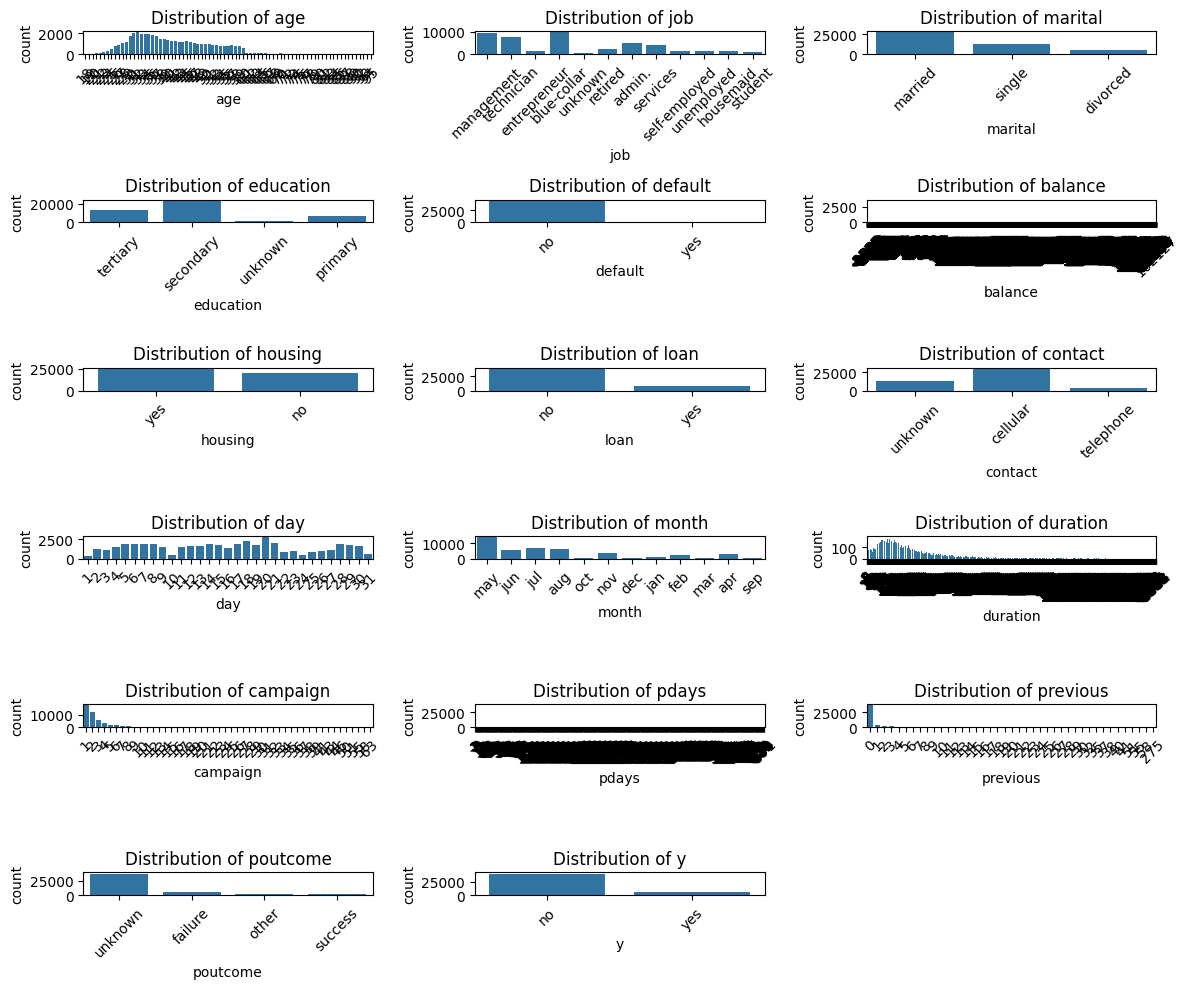

In [ ]:
categorical_features = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y']
plt.figure(figsize=(12, 10))
num_features = len(categorical_features)
rows = (num_features // 3) + (num_features % 3 > 0)
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(rows, 3, i)
    sns.countplot(x=feature, data=data)
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Shape of the dataset


In [ ]:
print(data.shape)

(45211, 17)


#3. Preprocessing

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


#Replace the Categorical Values to the Numerical Values

In [ ]:
# Encode 'job' (mapping each job to a unique number)
data['job'] = pd.factorize(data['job'])[0]

# Encode 'marital' (binary encoding: married = 1, single = 0)
data['marital'] = pd.factorize(data['marital'])[0]

# Encode 'education' (map to integers based on unique values)
data['education'] = pd.factorize(data['education'])[0]

# Encode 'contact' (mapping: unknown = 0, cellular = 1, etc.)
data['contact'] = pd.factorize(data['contact'])[0]

# Encode 'month' (map month names to numbers based on unique values)
data['month'] = pd.factorize(data['month'])[0]

# Encode 'poutcome' (unknown = 0, failure = 1, success = 2)
data['poutcome'] = pd.factorize(data['poutcome'])[0]

# Encode 'housing' (yes = 1, no = 0)
data['housing'] = pd.factorize(data['housing'])[0]

# Encode 'loan' (yes = 1, no = 0)
data['loan'] = pd.factorize(data['loan'])[0]

# Encode 'y' (target variable: yes = 1, no = 0)
data['y'] = pd.factorize(data['y'])[0]

# Display the cleaned DataFrame
print(data)


       age  job  marital  education default  balance  housing  loan  contact  \
0       58    0        0          0      no     2143        0     0        0   
1       44    1        1          1      no       29        0     0        0   
2       33    2        0          1      no        2        0     1        0   
3       47    3        0          2      no     1506        0     0        0   
4       33    4        1          2      no        1        1     0        0   
...    ...  ...      ...        ...     ...      ...      ...   ...      ...   
45206   51    1        0          0      no      825        1     0        1   
45207   71    5        2          3      no     1729        1     0        1   
45208   72    5        0          1      no     5715        1     0        1   
45209   57    3        0          1      no      668        1     0        2   
45210   37    2        0          1      no     2971        1     0        1   

       day  month  duration  campaign  

In [ ]:
data['y'] = data['y'].fillna(data['y'].mode()[0])
data['default'] = data['default'].map({"yes": 1, "no": 0})

In [ ]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,0,0,0,0,2143,0,0,0,5,0,261,1,-1,0,0,0
1,44,1,1,1,0,29,0,0,0,5,0,151,1,-1,0,0,0
2,33,2,0,1,0,2,0,1,0,5,0,76,1,-1,0,0,0
3,47,3,0,2,0,1506,0,0,0,5,0,92,1,-1,0,0,0
4,33,4,1,2,0,1,1,0,0,5,0,198,1,-1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,1,0,0,0,825,1,0,1,17,5,977,3,-1,0,0,1
45207,71,5,2,3,0,1729,1,0,1,17,5,456,2,-1,0,0,1
45208,72,5,0,1,0,5715,1,0,1,17,5,1127,5,184,3,3,1
45209,57,3,0,1,0,668,1,0,2,17,5,508,4,-1,0,0,0


#Heatmap for Correlation:

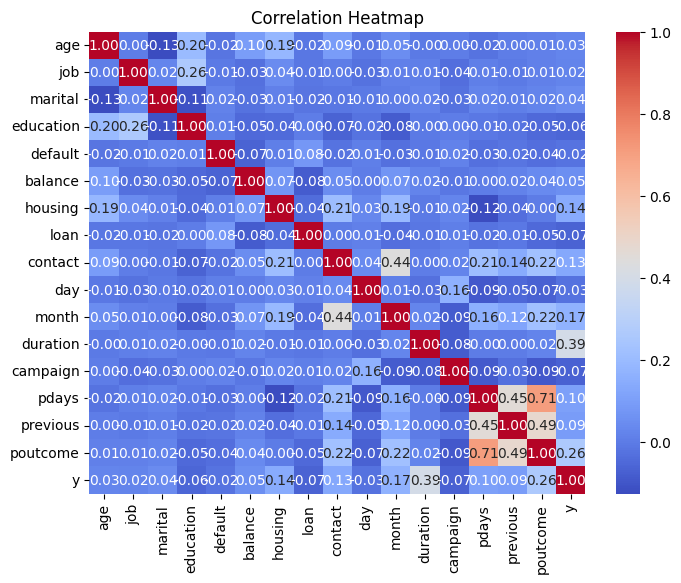

In [ ]:
plt.figure(figsize=(8,6))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

#Finding the Correlation between each feature and Remove the columns with less Correlation

In [ ]:
corr = data.corr()

y_corr = corr['y'].sort_values(ascending=False)

threshold = 0.1

low_corr_columns = y_corr[y_corr.abs() < threshold].index

data.drop(columns=low_corr_columns, inplace=True)

print("Columns removed:", low_corr_columns)
print("Updated data:", data.head())


Columns removed: Index(['previous', 'balance', 'marital', 'age', 'job', 'default', 'day',
       'education', 'loan', 'campaign'],
      dtype='object')
Updated data:    housing  contact  month  duration  pdays  poutcome  y
0        0        0      0       261     -1         0  0
1        0        0      0       151     -1         0  0
2        0        0      0        76     -1         0  0
3        0        0      0        92     -1         0  0
4        1        0      0       198     -1         0  0


# Plot the distribution of the target variable

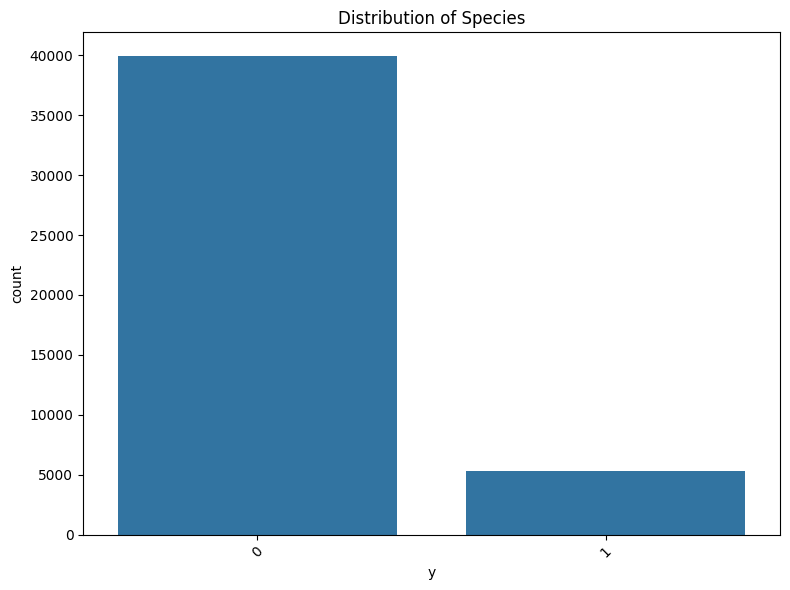

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='y', data=data)
plt.title('Distribution of Species')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#4. Splitting the data

In [ ]:
X = data.drop(columns=['y'])
y = data['y']


# Print the shapes of X and y to confirm the split

In [ ]:
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (45211, 6)
y shape: (45211,)


In [ ]:
X

,housing,contact,month,duration,pdays,poutcome
0,0,0,0,261,-1,0
1,0,0,0,151,-1,0
2,0,0,0,76,-1,0
3,0,0,0,92,-1,0
4,1,0,0,198,-1,0
...,...,...,...,...,...,...
45206,1,1,5,977,-1,0
45207,1,1,5,456,-1,0
45208,1,1,5,1127,184,3
45209,1,2,5,508,-1,0


In [ ]:
y

,y
0,0
1,0
2,0
3,0
4,0
...,...
45206,1
45207,1
45208,1
45209,0


#Splitting into Training and Testing sets and balance the class labels

In [ ]:
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Resampled class distribution:", y_train_smote.value_counts())


Resampled class distribution: y
0    31970
1    31970
Name: count, dtype: int64


# Display the shapes of the resulting datasets

In [ ]:
print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Testing labels shape: {y_test.shape}")

Training features shape: (36168, 6)
Testing features shape: (9043, 6)
Training labels shape: (36168,)
Testing labels shape: (9043,)


5. Building The Models

#A. Implimentation of Logistic Regression and analysing the perfomance

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg_model = LogisticRegression(
    C=1,
    penalty='l2',
    solver='lbfgs',
    max_iter=1000,
    random_state=42,
    l1_ratio=None,
)

log_reg_model.fit(X_train, y_train)

y_pred = log_reg_model.predict(X_test)

In [ ]:
 cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
 cnf_matrix

array([[7760,  192],
       [ 771,  320]])

In [ ]:
 from sklearn.metrics import classification_report
 print("\nClassification Report of Logistic Regression:\n",metrics.classification_report(y_test, y_pred))
 print ("---------------------------------------------------------------------")


Classification Report of Logistic Regression:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      7952
           1       0.62      0.29      0.40      1091

    accuracy                           0.89      9043
   macro avg       0.77      0.63      0.67      9043
weighted avg       0.88      0.89      0.88      9043

---------------------------------------------------------------------


In [ ]:

print('Accuracy of the classifer is %0.2f' % metrics.accuracy_score(y_test,y_pred))
print ("-------------------------------------------------------------------")

Accuracy of the classifer is 0.89
-------------------------------------------------------------------


#B. Implimenting KNN Classifier and analysing the perfomance

In [ ]:
 from sklearn.neighbors import KNeighborsClassifier
 knn = KNeighborsClassifier(n_neighbors=5)
 classifier = knn.fit(X_train,y_train)
 y_pred = classifier.predict(X_test)

In [ ]:
confusion = metrics.confusion_matrix(y_true = y_test,y_pred = y_pred)
confusion

array([[7583,  369],
       [ 692,  399]])

In [ ]:
print("\nClassification Report:\n",metrics.classification_report(y_test, y_pred))
print ("---------------------------------------------------------------------")


Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.95      0.93      7952
           1       0.52      0.37      0.43      1091

    accuracy                           0.88      9043
   macro avg       0.72      0.66      0.68      9043
weighted avg       0.87      0.88      0.87      9043

---------------------------------------------------------------------


In [ ]:
print('Accuracy of the classifer is %0.2f' % metrics.accuracy_score(y_test,y_pred))
print ("-------------------------------------------------------------------")

Accuracy of the classifer is 0.88
-------------------------------------------------------------------


#C. Implimentation of Decision Tree Classifier and analysing the perfomance

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

best_params = {'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2}

best_model = DecisionTreeClassifier(**best_params)

best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

test_accuracy = best_model.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)


Test Accuracy: 0.8971580227800509
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7952
           1       0.61      0.40      0.48      1091

    accuracy                           0.90      9043
   macro avg       0.77      0.68      0.71      9043
weighted avg       0.88      0.90      0.89      9043



In [ ]:
 from sklearn import metrics
 cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
 cnf_matrix

array([[7678,  274],
       [ 656,  435]])

In [ ]:
print("\nClassification Report:\n",metrics.classification_report(y_test, y_pred))
print ("---------------------------------------------------------------------")


Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      7952
           1       0.61      0.40      0.48      1091

    accuracy                           0.90      9043
   macro avg       0.77      0.68      0.71      9043
weighted avg       0.88      0.90      0.89      9043

---------------------------------------------------------------------


In [ ]:
print('Accuracy of the classifer is %0.2f' % metrics.accuracy_score(y_test,y_pred))
print ("-------------------------------------------------------------------")

Accuracy of the classifer is 0.90
-------------------------------------------------------------------


In [ ]:
feature_names = ['housing', 'contact', 'month', 'duration', 'pdays', 'poutcome']

class_names = ['Yes', 'No']

##Visualize the model
Visualize the Decision Tree on Training Data

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_text

dtc = DecisionTreeClassifier(criterion='gini', max_depth=5, max_features=None, min_samples_leaf=4, min_samples_split=2)

dtc.fit(X_train, y_train)

text_representation = export_text(dtc, feature_names=feature_names)


In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_text

text_representation = export_text(dtc, feature_names=feature_names)
print(text_representation)

|--- duration <= 510.50
|   |--- poutcome <= 2.50
|   |   |--- month <= 8.50
|   |   |   |--- duration <= 250.50
|   |   |   |   |--- month <= 3.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- month >  3.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- duration >  250.50
|   |   |   |   |--- contact <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- contact >  0.50
|   |   |   |   |   |--- class: 0
|   |   |--- month >  8.50
|   |   |   |--- housing <= 0.50
|   |   |   |   |--- month <= 9.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- month >  9.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- housing >  0.50
|   |   |   |   |--- duration <= 157.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- duration >  157.50
|   |   |   |   |   |--- class: 1
|   |--- poutcome >  2.50
|   |   |--- duration <= 139.50
|   |   |   |--- month <= 0.50
|   |   |   |   |--- duration <= 129.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- duration

In [ ]:
with open("decistion_tree_train.log", "w") as fout:
 fout.write(text_representation)

# Specify feature names as a list

In [ ]:
print(np.unique(y_train))

[0 1]


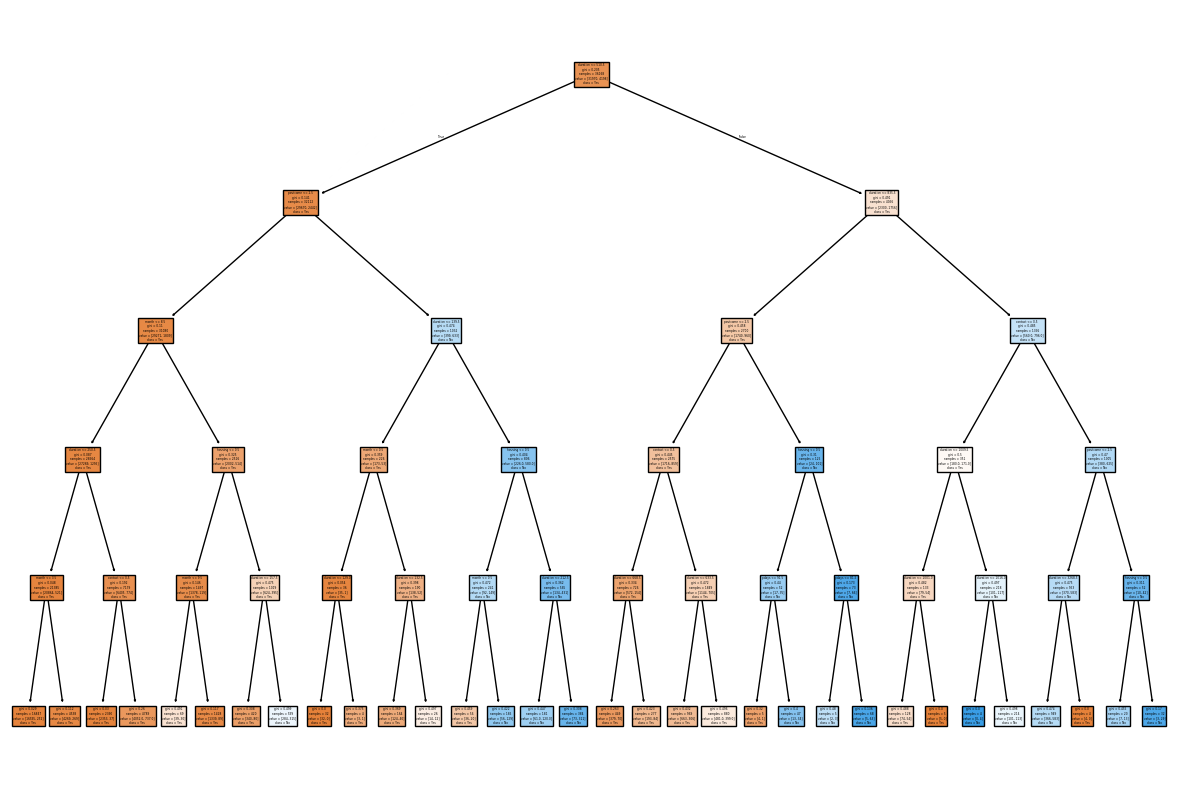

In [ ]:
# Plot the tree
from sklearn import tree
fig = plt.figure(figsize=(15,10))
tree.plot_tree(dtc, feature_names=feature_names, class_names=class_names, filled=True)
fig.savefig('decision_tree.png')
plt.show()

In [ ]:
fig.savefig("decistion_tree_train.png")

#Visualize the Decision Tree on Testing Data

In [ ]:
clf_test = DecisionTreeClassifier(random_state=1234)
dt_test = clf_test.fit(X_test, y_test)
text_representation = tree.export_text(clf_test)
print(text_representation)

|--- feature_3 <= 475.50
|   |--- feature_5 <= 2.50
|   |   |--- feature_2 <= 7.50
|   |   |   |--- feature_3 <= 169.50
|   |   |   |   |--- feature_2 <= 3.50
|   |   |   |   |   |--- feature_4 <= 543.00
|   |   |   |   |   |   |--- feature_4 <= 19.50
|   |   |   |   |   |   |   |--- feature_3 <= 116.50
|   |   |   |   |   |   |   |   |--- feature_3 <= 23.50
|   |   |   |   |   |   |   |   |   |--- feature_3 <= 22.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- feature_3 >  22.50
|   |   |   |   |   |   |   |   |   |   |--- feature_2 <= 1.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |   |--- feature_2 >  1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |--- feature_3 >  23.50
|   |   |   |   |   |   |   |   |   |--- feature_2 <= 2.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |  

In [ ]:
with open("decistion_tree_test.log", "w") as fout:
 fout.write(text_representation)

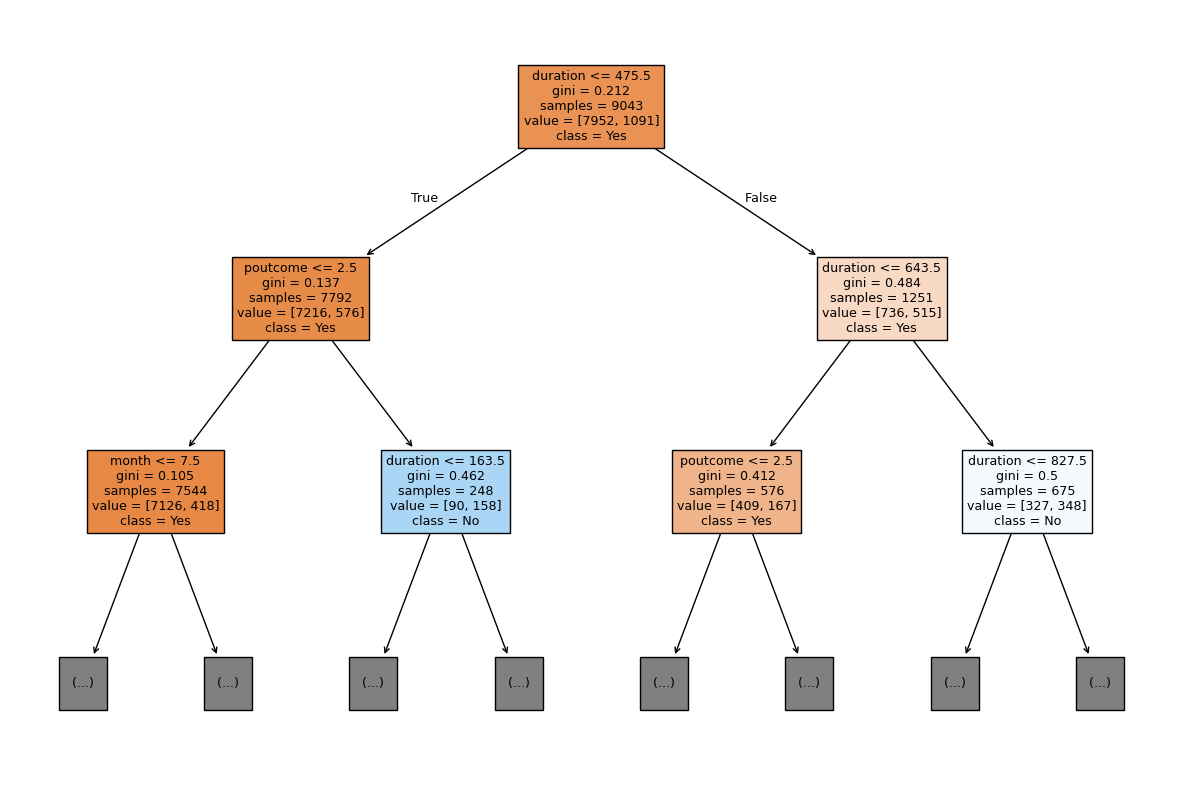

In [ ]:
fig = plt.figure(figsize=(15,10))
tree.plot_tree(clf_test, feature_names=feature_names, class_names=class_names,filled=True,max_depth = 2)
fig.savefig('imagename1.png')

fig.savefig("decistion_tree_test.png")

#Visualize the Decision Tree on overall Data

In [ ]:
clf = DecisionTreeClassifier(random_state=1234)
dt = clf.fit(X, y)
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_3 <= 521.50
|   |--- feature_5 <= 2.50
|   |   |--- feature_2 <= 8.50
|   |   |   |--- feature_3 <= 249.50
|   |   |   |   |--- feature_2 <= 3.50
|   |   |   |   |   |--- feature_3 <= 154.50
|   |   |   |   |   |   |--- feature_4 <= 390.50
|   |   |   |   |   |   |   |--- feature_3 <= 83.50
|   |   |   |   |   |   |   |   |--- feature_4 <= 292.50
|   |   |   |   |   |   |   |   |   |--- feature_2 <= 1.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- feature_2 >  1.50
|   |   |   |   |   |   |   |   |   |   |--- feature_1 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 7
|   |   |   |   |   |   |   |   |   |   |--- feature_1 >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 9
|   |   |   |   |   |   |   |   |--- feature_4 >  292.50
|   |   |   |   |   |   |   |   |   |--- feature_4 <= 293.50
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   | 

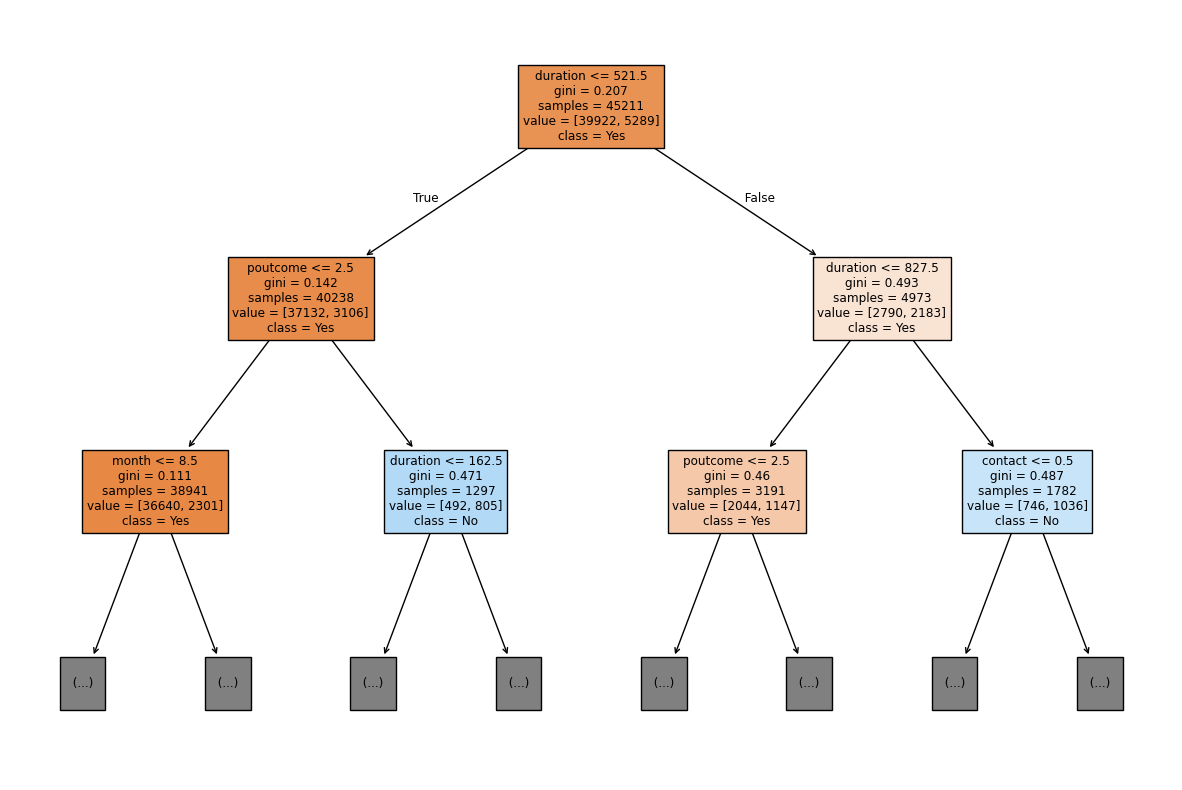

In [ ]:
with open("decision_tree.log", "w") as fout:
    fout.write(text_representation)

fig = plt.figure(figsize=(15, 10))
tree.plot_tree(clf, feature_names=feature_names, class_names=class_names, filled=True, max_depth=2)

fig.savefig('decision_tree_image.png')

plt.show()

##------------------------------------------------------------------  THE END   ---------------------------------------------------------------------